# Taller 01 de métodos computacionales para físicos  y astronomos
## Universidad de Antioquia
## Estiven Castrillon Alzate 1040570656

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('Solarize_Light2')

## Problema del borracho en 2D
**1** Realice el problema del borracho visto en clase, pero esta vez en dos dimensiones; es decir, que el desplazamiento se realice tanto en `x` como en `y` graficando la trayectoria del borracho.

**a)**  Considere un desplazamiento en `x` **o** en `y` de forma aleatoria

**b)** Ahora no considere restricciones en la dirección. Es decir, el desplazamiento se da tando en 'x' como en 'y'.

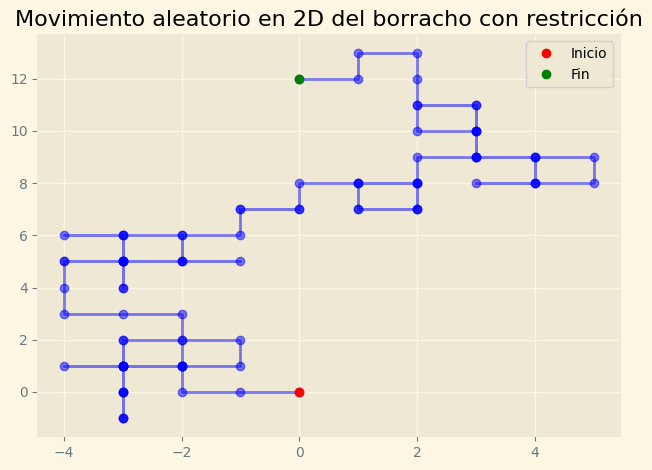

In [2]:
# --a) Considere un desplazamiento en `x` o en `y` de forma aleatoria-- #

posicion_x = [0]
posicion_y = [0]
for _ in range(100):
    # Generando un paso aleatorio (-1 o 1) y actualizando la posición
    valor_booleano = rd.choice([True, False])

    # --Eligiendo una posición entre x o y para cambiar-- #
    if valor_booleano:
        posicion_x.append(posicion_x[-1] + rd.choice([-1, 1]))
        posicion_y.append(posicion_y[-1])
    else:
        posicion_y.append(posicion_y[-1] + rd.choice([-1, 1]))
        posicion_x.append(posicion_x[-1])

# Graficación de trayectoria
plt.plot(posicion_x, posicion_y, 'bo-', alpha=0.5)

# Graficación de punto inicial y final
plt.plot(0, 0, 'ro', label='Inicio')
plt.plot(posicion_x[-1], posicion_y[-1], 'go', label='Fin')

plt.title('Movimiento aleatorio en 2D del borracho con restricción')
plt.tight_layout()
plt.legend()
plt.show()

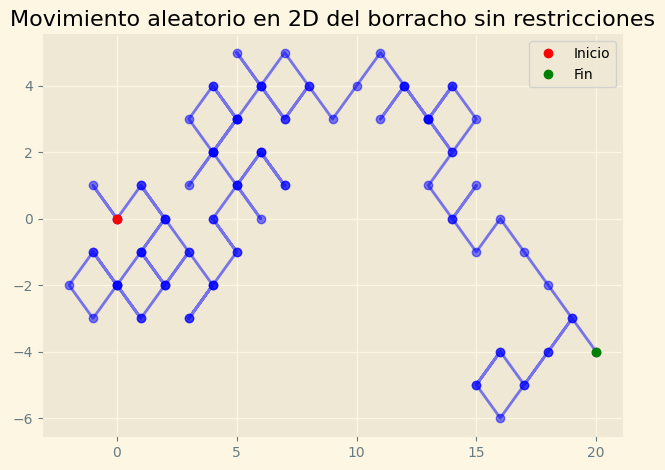

In [3]:
# --b) Ahora no considere restricciones en la dirección. Es decir, el desplazamiento se da tando en 'x' como en 'y'-- #
posicion_x = [0]
posicion_y = [0]
for _ in range(100):
    # Generando un paso aleatorio (-1 o 1) y actualizando la posición
    posicion_x.append(posicion_x[-1] + rd.choice([-1, 1]))
    posicion_y.append(posicion_y[-1] + rd.choice([-1, 1]))

# Graficación de trayectoria
plt.plot(posicion_x, posicion_y, 'bo-', alpha=0.5)

# Graficación de punto inicial y final
plt.plot(0, 0, 'ro', label='Inicio')
plt.plot(posicion_x[-1], posicion_y[-1], 'go', label='Fin')

plt.title('Movimiento aleatorio en 2D del borracho sin restricciones')
plt.tight_layout()
plt.legend()
plt.show()

## Binarios a decimales
**2** Realice una función en donde:

**a)** Se convierta un binario de 32bits a un decimal.

**b)** se convierta un binario de 64bits a un decimal.

**Nota**: desarrolle este ejercicio teniendo en cuenta la convención IEEE-754, es decir, los binarios están escritos en este formato.

In [45]:
def conversor_binario_decimal(numero_binario: str, mantisa: bool=False) -> float:
    """
    Conversor de un número binario a decimal con posibilidad de convertir la mantisa.
    """
    numero_decimal = 0
    for i in range(len(numero_binario)):
        if mantisa:
            # Suma cada bit multiplicado por 2 a la potencia de su posición negativa
            numero_decimal += int(numero_binario[i]) * 2 ** -(i+1)
        else:
            # Suma cada bit multiplicado por 2 a la potencia de su posición
            numero_decimal += int(numero_binario[-(i+1)]) * 2 ** i
    return numero_decimal

def conversor32bits_decimal(numero_binario: str) -> float:
    """
    Conversor de un número en formato binario IEEE 754 de 32 bits a decimal.
    """
    signo = numero_binario[0]
    exponente_binario = numero_binario[1:8+1]
    mantisa_binario = numero_binario[9::]

    # Convierte el exponente a decimal y resta el sesgo
    exponente_decimal = conversor_binario_decimal(exponente_binario) - 127
    # Convierte la mantisa a decimal y suma 1
    mantisa_decimal = 1 + conversor_binario_decimal(mantisa_binario, mantisa=True)

    # Calcula el número convertido
    numero_convertido = (-1) ** int(signo) * 2 ** (exponente_decimal) * mantisa_decimal
    return numero_convertido

def conversor64bits_decimal(numero_binario: str) -> float:
    """
    Conversor de un número en formato binario IEEE 754 de 64 bits a decimal.
    """
    signo = numero_binario[0]
    exponente_binario = numero_binario[1:11+1]
    mantisa_binario = numero_binario[12::]

    # Convierte el exponente a decimal y resta el sesgo
    exponente_decimal = conversor_binario_decimal(exponente_binario) - 1023
    # Convierte la mantisa a decimal y suma 1
    mantisa_decimal = 1 + conversor_binario_decimal(mantisa_binario, mantisa=True)

    # Calcula el número convertido
    numero_convertido = (-1) ** int(signo) * 2 ** (exponente_decimal) * mantisa_decimal
    return numero_convertido

print("Número decimal convertido de 64 bits: ", conversor64bits_decimal('0100000000001010000000000000000000000000000000000000000000000000'))
print("Número decimal convertido de 64 bits: ", conversor64bits_decimal('0011111111110000000000000000000000000000000000000000000000000000'))
print('-------------------------------------------')
print("Número decimal convertido de 32 bits: ", conversor32bits_decimal('00111111100000000000000000000000'))
print("Número decimal convertido de 32 bits: ", conversor32bits_decimal('01000000101000000000000000000000'))

Número decimal convertido de 64 bits:  3.25
Número decimal convertido de 64 bits:  1.0
-------------------------------------------
Número decimal convertido de 32 bits:  1.0
Número decimal convertido de 32 bits:  5.0


## Sucesión de Fibonacci
**3** Consulte la sucesión de Fibonacci y

**a)** Cree una función en Python para calcular la sucesión hasta el n-esimo termino (siendo n un argumento de entrada).

**b)** Demuestre que seleccionando números arbitrarios se cumple la proporción áurea.

**c)** Haga un cambio de coordenadas y grafique la espira de Fibonacci

In [5]:
# --a) Cree una función en Python para calcular la sucesión hasta el n-esimo termino (siendo n un argumento de entrada)-- #
def fibonacci(nesimo_termino: int) -> int:
    """
    Calcula el n-ésimo término de la secuencia de Fibonacci.

    Parámetros:
    nesimo_termino: El índice del término de la secuencia de Fibonacci que se desea calcular.

    Devuelve:
    El n-ésimo término de la secuencia de Fibonacci.
    """
    # Los dos primeros términos de la secuencia de Fibonacci
    termino_0 = 0
    termino_1 = 1

    for _ in range(nesimo_termino):
        # Guarda el valor del término actual en una variable temporal
        temporal = termino_1

        # Calcula el próximo término de la secuencia como la suma de los dos términos anteriores
        termino_1 = termino_0 + termino_1

        # Actualiza el valor del término anterior para la próxima iteración
        termino_0 = temporal

    return termino_0

print(fibonacci(8))

21


In [6]:
# -- b) Demuestre que seleccionando números arbitrarios se cumple la proporción áurea-- #

# La proporción áurea es un número irracional que se aproxima a 1.6181234. 
# Se obtiene al dividir cualquier número siguiente de la secuencia de Fibonacci por el número
# Esto para evitar errores de división por cero con la fórmula de la proporción áurea del número dividido el anterior

# Generando 100 números aleatorios
numeros = np.random.randint(1, 100, 10)
print(f'Números aleatorios: {list(numeros)}\n')
# Calculando la proporción aúrea para cada número aleatorio
print('Proporción áurea para cada número:')
for numero in numeros:
    print(fibonacci(numero + 1) / fibonacci(numero))

Números aleatorios: [88, 89, 5, 15, 34, 84, 1, 25, 34, 81]

Proporción áurea para cada número:
1.618033988749895
1.618033988749895
1.6
1.618032786885246
1.6180339887499087
1.618033988749895
1.0
1.6180339886704431
1.6180339887499087
1.618033988749895


Proporción Áurea: 1.618033988749895


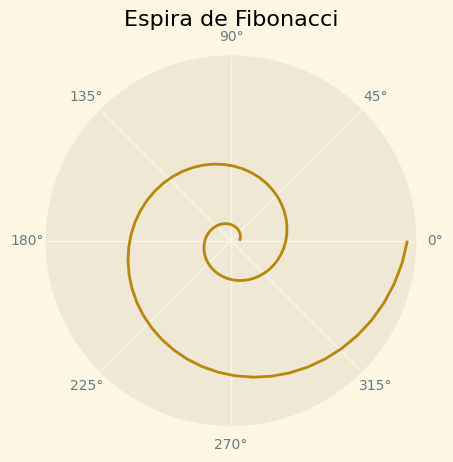

In [20]:
# --c) Haga un cambio de coordenadas y grafique la espira de Fibonacci-- #
def plot_fibonacci(secuencia: list[int]) -> None:
    """
    Grafica una espiral de Fibonacci en un eje polar.

    La función toma una secuencia de Fibonacci como entrada y calcula la proporción áurea entre los dos últimos términos de la secuencia.
    Luego, genera ángulos para la espiral y calcula el radio para la espiral.
    Finalmente, traza la espiral en un gráfico polar y muestra el gráfico.

    :param secuencia: Una lista de números enteros que representan una secuencia de Fibonacci.
    """
    # Calcular la razón áurea entre los dos últimos términos de la secuencia
    proporcion_aurea = secuencia[-1] / secuencia[-2]
    print(f"Proporción Áurea: {proporcion_aurea}")

    # Generar ángulos y radio en polares para la espiral
    angulos = np.linspace(0, 4 * np.pi, num=len(secuencia))
    radio = proporcion_aurea ** (angulos / np.pi)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angulos, radio, label="Espiral de Fibonacci", color='#B8860B')
    ax.set_rticks([])  # Eliminar las etiquetas radiales
    ax.grid(True)

    ax.set_title("Espira de Fibonacci", va='top')
    plt.show()

plot_fibonacci([fibonacci(n) for n in range(1, 100)])

## Error en la serie de la función exponencial
**4**. Realice un análisis similar al visto en clase (para la función seno) por error de método para la serie de $e^x$. ¿En cuál de las dos series (seno o euler) crece más rápido el error?

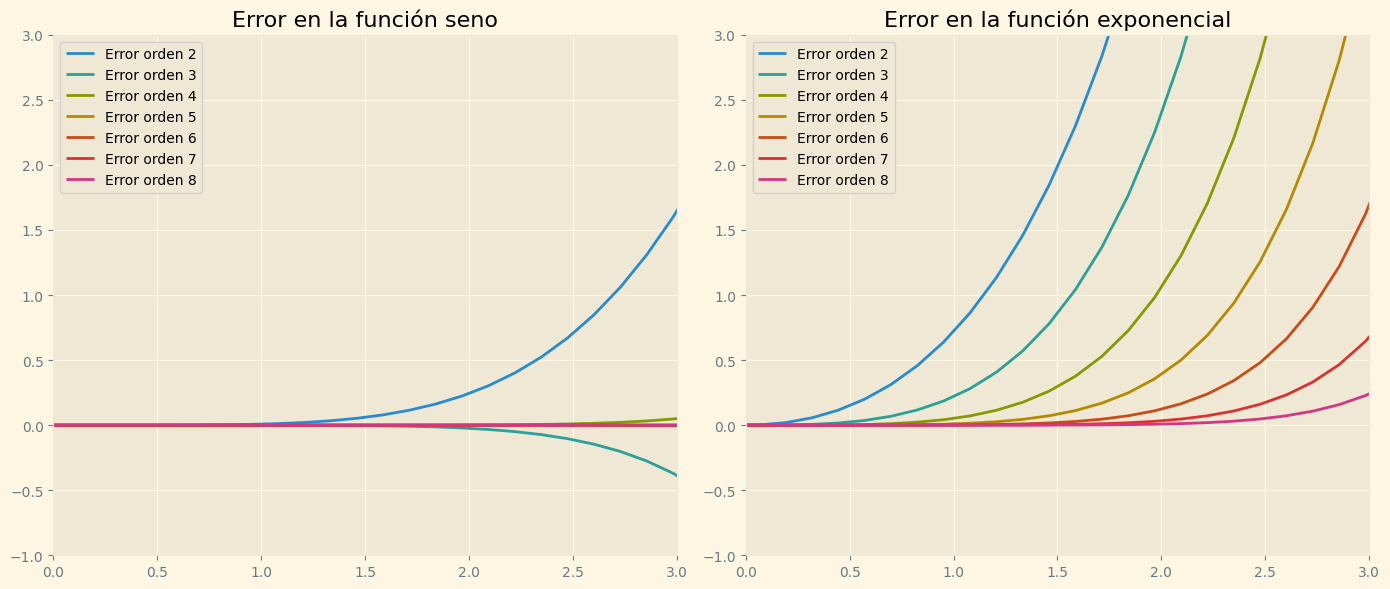

In [8]:
def exponencial(x: float, orden: int) -> float:
    """
    Calcula el valor de la función exponencial de x hasta el n-ésimo término.

    Parámetros:
    x: El valor de x para el que se desea calcular la función exponencial.
    orden: El número de términos de la serie de Taylor que se utilizarán para calcular la función exponencial.

    Devuelve:
    El valor de la función exponencial de x hasta el n-ésimo término.
    """
    exponencial = 0
    for n in range(orden):
        exponencial += x ** n / np.math.factorial(n)

    return exponencial

def seno(x: float, orden: int) -> float:
    """
    Calcula el valor de la función seno de x hasta el n-ésimo término.

    Parámetros:
    x: El valor de x para el que se desea calcular la función seno.
    orden: El número de términos de la serie de Taylor que se utilizarán para calcular la función seno.

    Devuelve:
    El valor de la función seno de x hasta el n-ésimo término.
    """
    seno = 0
    for n in range(orden):
        seno += (-1) ** n * x ** (2 * n + 1) / np.math.factorial(2 * n + 1)

    return seno

def plot_error(ax, func_vectorizada, func_numpy, x: np.array, ordenes: list[int], title: str) -> None:
    """
    Grafica el error entre una función vectorizada y una función de numpy para diferentes órdenes.

    Parámetros:
    ax (axes.Axes): El eje en el que se dibujará el gráfico.
    func_vectorizada (function): La función vectorizada a comparar.
    func_numpy (function): La función de numpy a comparar.
    x (np.array): Los valores de entrada para las funciones.
    ordenes (list[int]): Los órdenes para calcular el error.
    title (str): El título del gráfico.

    Devuelve:
    None: Esta función no devuelve nada, muestra un gráfico.
    """
    
    # Calcular la función real con numpy preferiblemente
    y = func_numpy(x)

    # Calcular y graficar el error para cada orden
    for orden in ordenes:
        y_orden = func_vectorizada(x, orden=orden)
        ax.plot(x, y - y_orden, label=f'Error orden {orden}')

    # Establecer los límites de la gráfica
    ax.set_xlim([0,3])
    ax.set_ylim([-1,3])

    ax.legend()
    ax.legend(loc='upper left')
    ax.set_title(title)

# Definir los valores de x y los órdenes
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
ordenes = [2, 3, 4, 5, 6, 7, 8]

# Vectorizar las funciones seno y exponencial
seno_vectorizado = np.vectorize(seno, excluded=['orden'])
exponencial_vectorizada = np.vectorize(exponencial, excluded=['orden'])

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graficar el error para las funciones seno y exponencial
plot_error(axs[0], seno_vectorizado, np.sin, x, ordenes, 'Error en la función seno')
plot_error(axs[1], exponencial_vectorizada, np.exp, x, ordenes, 'Error en la función exponencial')

plt.tight_layout()
plt.show()

En conclusión, la serie para la función exponencial tiene un creciemiento más rápido en su error que la función seno, las dos gráficas tienen las mismas escalas y se ve gráficamente cómo la función exponencial desde valores muy cercanos a cero empieza a tener un error creciente muy rápido, más rápido que la del seno.

## Clase para movimiento parabólico
**5** **a)** Programe una clase que encuentre en un tiempo dado la posición en x o en y en un movimiento en tiro parabólico, dadas las demás condiciones ($V_0,\theta,x_0,y_0$).

**b)** Luego genere una lista de 100 tiempos y cree un Dataframe con columnas($x,y,t$).

**c)** Finalmente, genere un plot con tres graficas $(x,t)$, $(y,t)$, y $(x,y)$.

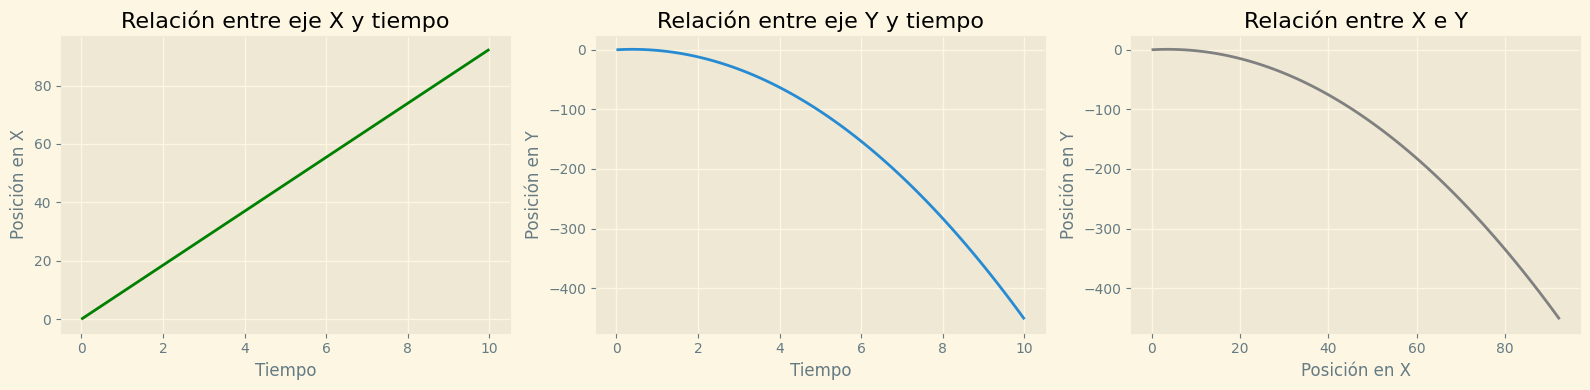

In [17]:
class Posicion:
    """
    Clase para calcular la posición en un movimiento parabólico.

    Atributos:
    v_0 (float): Velocidad inicial.
    theta (float): Ángulo de lanzamiento en radianes.
    x_0 (float): Posición inicial en el eje x.
    y_0 (float): Posición inicial en el eje y.
    g (float): Aceleración debido a la gravedad. Por defecto es 9.81 m/s^2.
    """

    def __init__(self, v_0, theta, x_0, y_0, g=9.81):
        self.v_0 = v_0
        self.theta = theta
        self.x_0 = x_0
        self.y_0 = y_0
        self.g = g
    
    def posicion_x(self, t):
        """
        Calcula la posición en el eje x en un tiempo t.

        Parámetros:
        t (float): El tiempo en el que se calcula la posición.

        Devuelve:
        float: La posición en el eje x en el tiempo t.
        """
        return (self.v_0 * np.cos(self.theta) * t) + self.x_0
    
    def posicion_y(self, t):
        """
        Calcula la posición en el eje y en un tiempo t.

        Parámetros:
        t (float): El tiempo en el que se calcula la posición.

        Devuelve:
        float: La posición en el eje y en el tiempo t.
        """
        return (self.v_0 * np.sin(self.theta) * t) - (0.5 * self.g * t ** 2) + self.y_0
    
tiempos = np.linspace(0, 10, 100)

# Instancia de la clase
posicion = Posicion(10, np.pi / 8, 0, 0)

# calculando las posiciones en los ejes x e y para todos los tiempos
x = posicion.posicion_x(tiempos)
y = posicion.posicion_y(tiempos)

# Dataframe de datos
datos = pd.DataFrame({'t': tiempos, 'x': x, 'y': y})

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Gráfico (x,t)
axs[0].plot(datos['t'], datos['x'], color='green')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Posición en X')
axs[0].set_title('Relación entre eje X y tiempo')
axs[0].grid(True)

# Gráfico (y,t)
axs[1].plot(datos['t'], datos['y'])
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Posición en Y')
axs[1].set_title('Relación entre eje Y y tiempo')
axs[1].grid(True)

# Gráfico (x,y)
axs[2].plot(datos['x'], datos['y'], color='gray')
axs[2].set_xlabel('Posición en X')
axs[2].set_ylabel('Posición en Y')
axs[2].set_title('Relación entre X e Y')
axs[2].grid(True)

plt.tight_layout()
plt.show()